In [2]:
import torch
from torch import nn
import torchvision
from torchvision import transforms

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device : {device}')

Using device : cuda


In [4]:
input_size = 28*28
num_classes = 10

hidden_size = 400

num_epochs = 5
batch_size = 32
learning_rate = 0.005

In [5]:
# MNIST Dataset
train_dataset = torchvision.datasets.MNIST(root = '../../data',
                                           train = True,
                                           transform = transforms.ToTensor(),
                                           download = True,
                                           )

test_dataset = torchvision.datasets.MNIST(root = '../../data',
                                          train = False, # this dataset is for test
                                          transform = transforms.ToTensor(),
                                          )

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw



In [6]:
# DataLoader
train_dataloader = torch.utils.data.DataLoader(dataset = train_dataset,
                                               batch_size = batch_size,
                                               shuffle = True, # Train dataset can be shuffled
                                               )
test_dataloader = torch.utils.data.DataLoader(dataset = test_dataset,
                                              batch_size = batch_size, # You can change batch_size between train and test
                                              shuffle = False, # But test can't 
                                              )

In [7]:
nn.Module.__doc__

'Base class for all neural network modules.\n\n    Your models should also subclass this class.\n\n    Modules can also contain other Modules, allowing to nest them in\n    a tree structure. You can assign the submodules as regular attributes::\n\n        import torch.nn as nn\n        import torch.nn.functional as F\n\n        class Model(nn.Module):\n            def __init__(self):\n                super(Model, self).__init__()\n                self.conv1 = nn.Conv2d(1, 20, 5)\n                self.conv2 = nn.Conv2d(20, 20, 5)\n\n            def forward(self, x):\n                x = F.relu(self.conv1(x))\n                return F.relu(self.conv2(x))\n\n    Submodules assigned in this way will be registered, and will have their\n    parameters converted too when you call :meth:`to`, etc.\n\n    :ivar training: Boolean represents whether this module is in training or\n                    evaluation mode.\n    :vartype training: bool\n    '

In [8]:
# Build Model
class Feedforward(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Feedforward, self).__init__()
        
        self.input_layer = nn.Linear(input_size, hidden_size)
        self.FullyConnected = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.input_layer(x)
        x = self.relu(x)
        output = self.FullyConnected(x)

        return output

In [9]:
# Declare model and set CUDA on model
model = Feedforward(input_size, hidden_size, num_classes).to(device)

In [10]:
# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate) 

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2

In [12]:
from tqdm import tqdm
# Train the model

losses = []
steps = []

total_step = len(train_dataloader) * num_epochs
train_step = 1
log_interval = 500
for epoch in range(1, num_epochs + 1):
    for batch_idx, (images, labels) in enumerate(
        tqdm(train_dataloader, position=0, leave=True, desc='train')
    ):
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        # # You can check the image
        # plt.imshow(images[0][0], cmap = cm.gray); plt.axis('off')
        # # plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)); plt.axis('off')
        
        # Forward pass
        preds = model(images)
        loss = criterion(preds, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Logging
        if train_step%log_interval == 0 :
            print(f'Epoch : {epoch}/{num_epochs}  Train Step : {train_step}/{total_step}  Loss : {loss.item():.4f}')
            losses.append(loss.item())
            steps.append(train_step)

        train_step += 1


train:  28%|██▊       | 534/1875 [00:03<00:08, 165.25it/s]

Epoch : 1/5  Train Step : 500/9375  Loss : 0.1281


train:  54%|█████▍    | 1018/1875 [00:06<00:05, 163.97it/s]

Epoch : 1/5  Train Step : 1000/9375  Loss : 0.0726


train:  82%|████████▏ | 1533/1875 [00:09<00:02, 161.81it/s]

Epoch : 1/5  Train Step : 1500/9375  Loss : 0.3475


train:   8%|▊         | 142/1875 [00:00<00:10, 161.96it/s]

Epoch : 2/5  Train Step : 2000/9375  Loss : 0.3509


train:  34%|███▍      | 640/1875 [00:03<00:07, 167.22it/s]

Epoch : 2/5  Train Step : 2500/9375  Loss : 0.3578


train:  62%|██████▏   | 1155/1875 [00:06<00:04, 171.41it/s]

Epoch : 2/5  Train Step : 3000/9375  Loss : 0.0211


train:  88%|████████▊ | 1643/1875 [00:09<00:01, 170.04it/s]

Epoch : 2/5  Train Step : 3500/9375  Loss : 0.4917


train:  14%|█▍        | 267/1875 [00:01<00:09, 170.89it/s]

Epoch : 3/5  Train Step : 4000/9375  Loss : 0.0541


train:  41%|████      | 771/1875 [00:04<00:06, 172.96it/s]

Epoch : 3/5  Train Step : 4500/9375  Loss : 0.1012


train:  68%|██████▊   | 1281/1875 [00:07<00:03, 164.84it/s]

Epoch : 3/5  Train Step : 5000/9375  Loss : 0.2392


train:  95%|█████████▍| 1778/1875 [00:10<00:00, 163.79it/s]

Epoch : 3/5  Train Step : 5500/9375  Loss : 0.3987


train:  21%|██        | 398/1875 [00:02<00:08, 167.92it/s]

Epoch : 4/5  Train Step : 6000/9375  Loss : 0.0021


train:  48%|████▊     | 908/1875 [00:05<00:05, 168.69it/s]

Epoch : 4/5  Train Step : 6500/9375  Loss : 0.0096


train:  75%|███████▍  | 1400/1875 [00:08<00:02, 171.68it/s]

Epoch : 4/5  Train Step : 7000/9375  Loss : 0.2828


train: 100%|██████████| 1875/1875 [00:11<00:00, 167.71it/s]


Epoch : 4/5  Train Step : 7500/9375  Loss : 0.2713


train:  28%|██▊       | 529/1875 [00:03<00:09, 138.76it/s]

Epoch : 5/5  Train Step : 8000/9375  Loss : 0.1587


train:  55%|█████▍    | 1026/1875 [00:07<00:05, 163.88it/s]

Epoch : 5/5  Train Step : 8500/9375  Loss : 0.0890


train:  81%|████████  | 1522/1875 [00:10<00:02, 165.92it/s]

Epoch : 5/5  Train Step : 9000/9375  Loss : 0.0165


train: 100%|██████████| 1875/1875 [00:12<00:00, 153.08it/s]


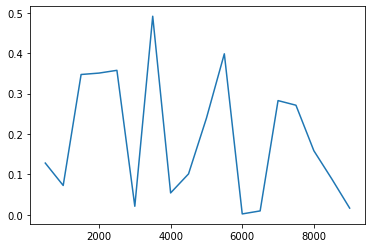

In [13]:
plt.plot(steps, losses)

In [14]:
# Test the model

with torch.no_grad():
    correct = 0
    total = 0
    for batch_idx, (images, labels) in enumerate(
        tqdm(test_dataloader, position=0, leave=True, desc='test')
    ):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        a, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # break
    print(f'Accuracy of test images : {correct / total * 100:.4f}%')
torch.save(model.state_dict(), 'model.ckpt')

test: 100%|██████████| 313/313 [00:01<00:00, 207.69it/s]

Accuracy of test images : 97.3500%
